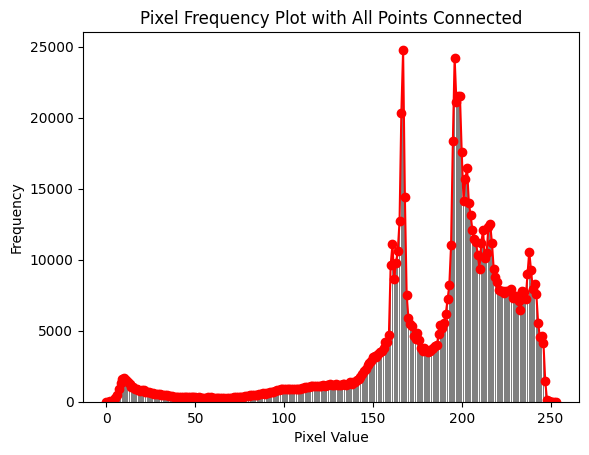

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_pixel_frequency(image_path):
    # Read the image using OpenCV
    image = cv2.imread("input2.jpg", cv2.IMREAD_GRAYSCALE)

    # Calculate the pixel frequency
    pixel_values, counts = np.unique(image, return_counts=True)

    # Plot the pixel frequency
    plt.bar(pixel_values, counts, color='gray')

    # Connect all frequencies with a line
    plt.plot(pixel_values, counts, 'ro-')  # Red dots connected with a line

    plt.title('Pixel Frequency Plot with All Points Connected')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Replace 'your_image_path.jpg' with the path to your image file
image_path = 'input2.jpg'
plot_pixel_frequency(image_path)


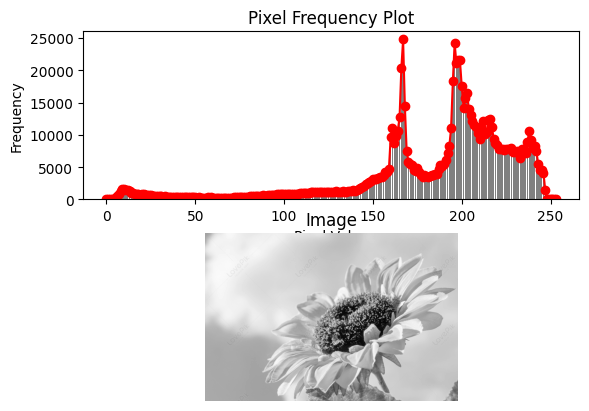

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_pixel_frequency(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the pixel frequency
    pixel_values, counts = np.unique(image, return_counts=True)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [10, 10]})

    # Plot the pixel frequency
    ax1.bar(pixel_values, counts, color='gray')
    ax1.set_title('Pixel Frequency Plot')
    ax1.set_xlabel('Pixel Value')
    ax1.set_ylabel('Frequency')

    # Connect all frequencies with a line
    ax1.plot(pixel_values, counts, 'ro-')  # Red dots connected with a line

    # Display the image on the second subplot
    ax2.imshow(image, cmap='gray')
    ax2.set_title('Image')
    ax2.axis('off')

    plt.show()

# Replace 'your_image_path.jpg' with the path to your image file
image_path = 'input2.jpg'
plot_pixel_frequency(image_path)


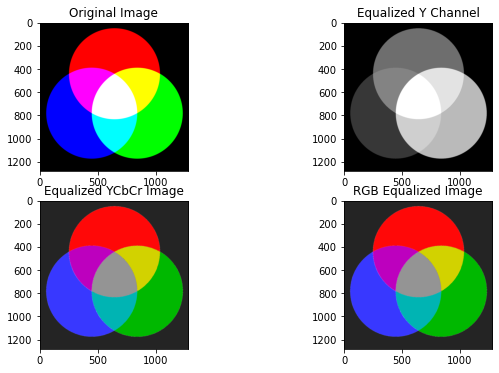

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('input.jpg')  # Replace 'your_image_path.jpg' with the actual path to your image

# Convert from RGB to YCbCr
ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Split the YCbCr image into components
y, cb, cr = cv2.split(ycbcr_image)

# Calculate histogram of Y channel
hist, bins = np.histogram(y.flatten(), 256, [0, 256])

# Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Perform histogram equalization
y_equalized = np.interp(y.flatten(), bins[:-1], cdf_normalized)

# Reshape back to original shape
y_equalized = y_equalized.reshape(y.shape)

# Create the equalized YCbCr image
ycbcr_equalized_image = cv2.merge([y_equalized.astype(np.uint8), cb, cr])

# Convert the equalized YCbCr image back to RGB
rgb_equalized_image = cv2.cvtColor(ycbcr_equalized_image, cv2.COLOR_YCrCb2BGR)

# Display the results using matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(y_equalized, cmap='gray')
plt.title('Equalized Y Channel')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(ycbcr_equalized_image, cv2.COLOR_YCrCb2RGB))
plt.title('Equalized YCbCr Image')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(rgb_equalized_image, cv2.COLOR_BGR2RGB))
plt.title('RGB Equalized Image')

plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('input2.jpg')  # Replace 'your_image_path.jpg' with the actual path to your image

# Convert from RGB to YCbCr
ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Split the YCbCr image into components
y, cb, cr = cv2.split(ycbcr_image)

# Calculate histogram of Y channel
hist, bins = np.histogram(y.flatten(), 256, [0, 256])

# Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Perform histogram equalization
y_equalized = np.interp(y.flatten(), bins[:-1], cdf_normalized)

# Reshape back to original shape
y_equalized = y_equalized.reshape(y.shape)

# Create the equalized YCbCr image
ycbcr_equalized_image = cv2.merge([y_equalized.astype(np.uint8), cb, cr])

# Convert the equalized YCbCr image back to RGB
rgb_equalized_image = cv2.cvtColor(ycbcr_equalized_image, cv2.COLOR_YCrCb2BGR)

# Save the images
cv2.imwrite('original_image.jpg', image)
cv2.imwrite('equalized_y_channel.jpg', y_equalized)
cv2.imwrite('equalized_ycbcr_image.jpg', cv2.cvtColor(ycbcr_equalized_image, cv2.COLOR_YCrCb2BGR))
cv2.imwrite('rgb_equalized_image.jpg', rgb_equalized_image)


True

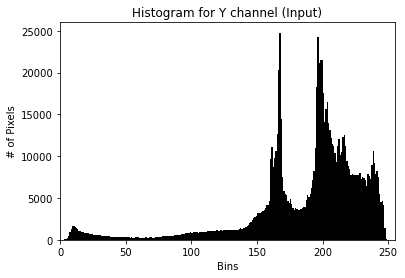

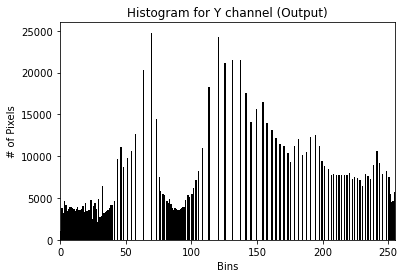

Image saved at: 2/cv_image_eq_2.jpg


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in BGR format
image_bgr = cv2.imread('2/input2.jpg', cv2.IMREAD_COLOR)

# Convert from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Convert from RGB to YCrCb color space
image_ycrcb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)

# Split the channels
y_channel, cr_channel, cb_channel = cv2.split(image_ycrcb)

# Function to calculate and plot histogram
def plot_histogram(channel, title, color):
    plt.figure()
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    plt.hist(channel.ravel(), 255, [0, 255], color=color)
    plt.xlim([0, 255])

# Plot histogram of the Y channel input
plot_histogram(y_channel, 'Histogram for Y channel (Input)', 'black')

# Apply histogram equalization to the Y channel
y_channel_eq = cv2.equalizeHist(y_channel)

# Merge the equalized Y channel back with the Cr and Cb channels
image_ycrcb_eq = cv2.merge((y_channel_eq, cr_channel, cb_channel))

# Convert the equalized YCrCb image back to RGB to show the result later
image_rgb_eq = cv2.cvtColor(image_ycrcb_eq, cv2.COLOR_YCrCb2RGB)

# Plot histogram of the equalized Y channel
plot_histogram(y_channel_eq, 'Histogram for Y channel (Output)', 'black')

# Displaying the plots
plt.show()

# Save the equalized RGB image to file
output_image_path = '2/cv_image_eq_2.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb_eq, cv2.COLOR_RGB2BGR))

# Return the path to the saved image
print(f"Image saved at: {output_image_path}")
